## 1. Importing the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries imported sucessfully')

Libraries imported sucessfully


In [2]:
import warnings
warnings.filterwarnings('ignore')

## 2. Load the dataset

In [3]:
df_train = pd.read_csv('train_s3TEQDk.csv')
df_train['Source'] = 'Train'
df_test = pd.read_csv('test_mSzZ8RL.csv')
df_test['Source'] = 'Test'
df = pd.concat([df_train,df_test],ignore_index=True)
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,Train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,Train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,Train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,Train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,Train


## 3. Checking and cleaning the dataset

In [4]:
# Last 5 rows
df.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Source
351032,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,NaN,Test
351033,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,NaN,Test
351034,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,NaN,Test
351035,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes,NaN,Test
351036,F2NOYPPZ,Male,27,RG256,Salaried,X1,21,No,591565,No,NaN,Test


In [5]:
# shape
df.shape

(351037, 12)

In [6]:
print('The number of rows are :',df.shape[0])
print('The number of columns are :',df.shape[1])

The number of rows are : 351037
The number of columns are : 12


In [7]:
# Check the column names
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'Source'],
      dtype='object')

In [8]:
# Checking the unique values
df.nunique()

ID                     351037
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    162137
Is_Active                   2
Is_Lead                     2
Source                      2
dtype: int64

In [9]:
# Checking the datatypes
df.dtypes

ID                      object
Gender                  object
Age                      int64
Region_Code             object
Occupation              object
Channel_Code            object
Vintage                  int64
Credit_Product          object
Avg_Account_Balance      int64
Is_Active               object
Is_Lead                float64
Source                  object
dtype: object

In [10]:
# Checking the description
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,351037.000000,351037.000000,3.510370e+05,245725.000000
mean,43.860716,46.924244,1.130141e+06,0.237208
std,14.841932,32.329303,8.569530e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.041850e+05,0.000000
50%,43.000000,32.000000,8.951620e+05,0.000000
75%,54.000000,73.000000,1.368152e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [11]:
# Checking file summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   351037 non-null  object 
 1   Gender               351037 non-null  object 
 2   Age                  351037 non-null  int64  
 3   Region_Code          351037 non-null  object 
 4   Occupation           351037 non-null  object 
 5   Channel_Code         351037 non-null  object 
 6   Vintage              351037 non-null  int64  
 7   Credit_Product       309190 non-null  object 
 8   Avg_Account_Balance  351037 non-null  int64  
 9   Is_Active            351037 non-null  object 
 10  Is_Lead              245725 non-null  float64
 11  Source               351037 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 32.1+ MB


There are some categorical variable need to change to numerical variable.

In [12]:
# Checking the missing values
df.isna().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
Source                      0
dtype: int64

The missing value is present in the `Credit_Product` and `Is_Lead` column. But the `Is_Lead` is our target variable.

In [13]:
# now fill the missing value with NA as its not available in the Credit product column
df['Credit_Product'] = df['Credit_Product'].fillna('NA')

In [14]:
# Now once again checking the missing value
df.isna().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
Source                      0
dtype: int64

No missing value is present except `Is_lead` because its target variable.

In [15]:
df[:4]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,Train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,Train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,Train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,Train


## 4. Data Visulization

###  Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

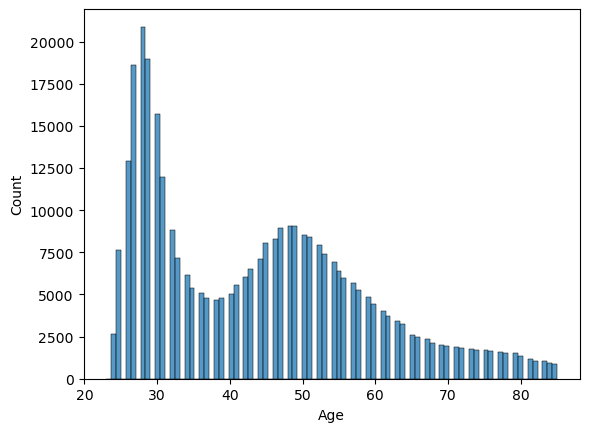

In [17]:
sns.histplot(data=df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

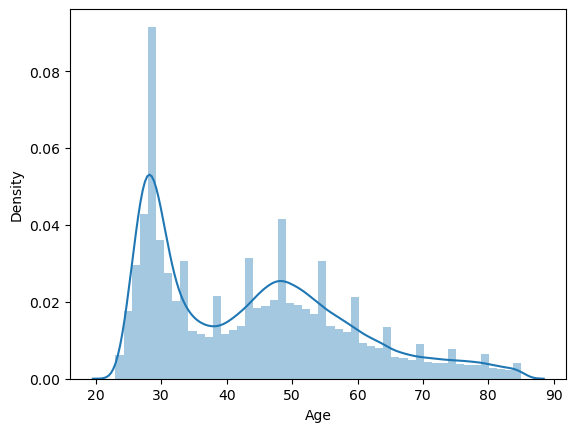

In [18]:
sns.distplot(df['Age'])

More people having age 30. As the age increses count of people starts decreses.

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

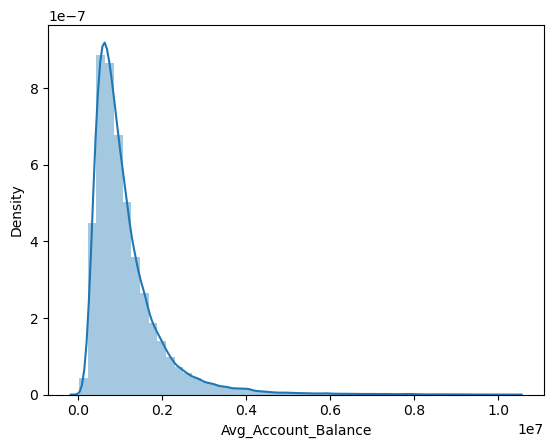

In [19]:
sns.distplot(df['Avg_Account_Balance'])

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Count'>

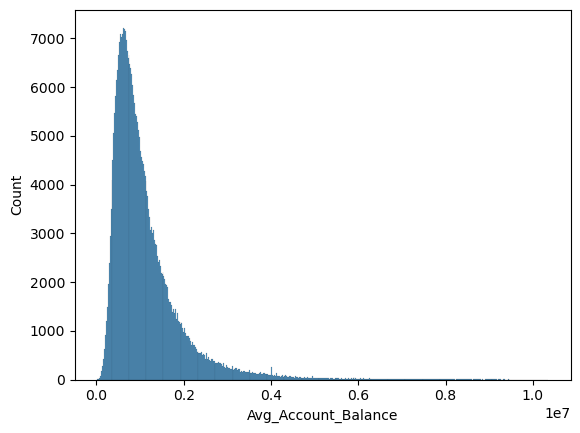

In [21]:
sns.histplot(df['Avg_Account_Balance'])

Data is skewed in the low avg_Account_Balance.

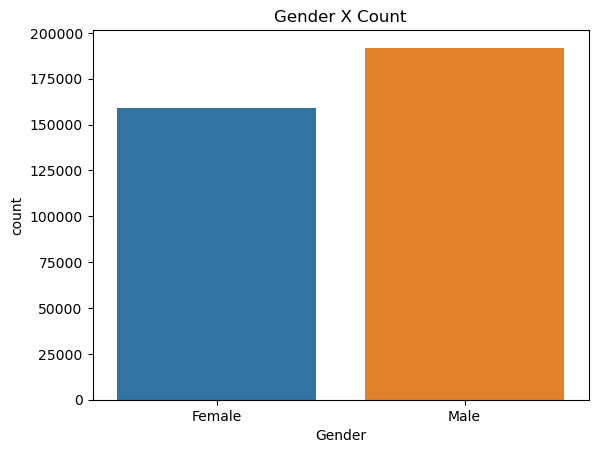

In [22]:
sns.countplot(data=df,x='Gender')
plt.title('Gender X Count')
plt.show()

Male count is more than the female count.

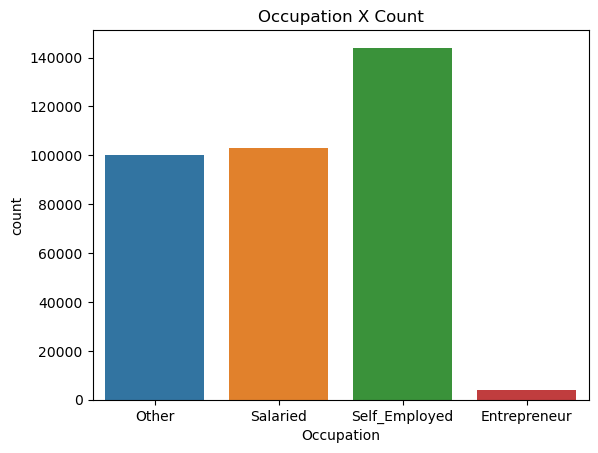

In [23]:
sns.countplot(data=df,x='Occupation')
plt.title('Occupation X Count')
plt.show()

SelfEmployed count is highest and entrepreneur count is lowest in the dataset.

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

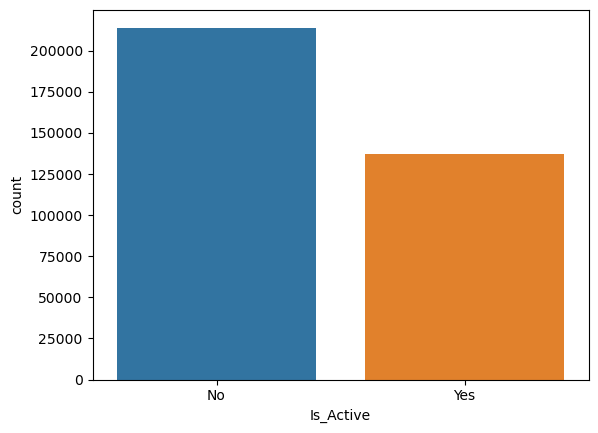

In [24]:
sns.countplot(data=df,x='Is_Active')

No count is more than the yes count.

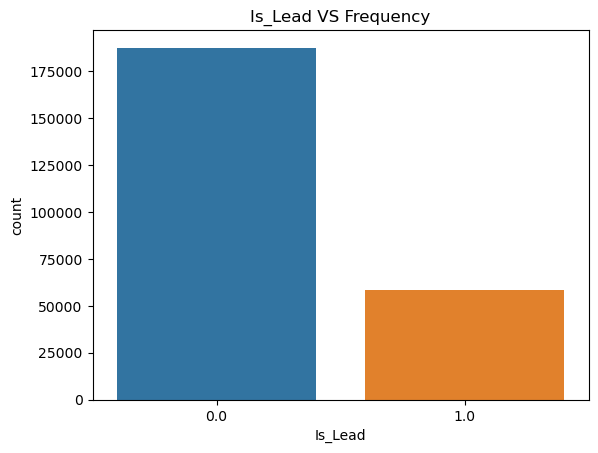

In [25]:
sns.countplot(data=df,x='Is_Lead')
plt.title('Is_Lead VS Frequency')
plt.show()

0 value has more count. Data is imbalanced need to be corrected before applying the algorithm.

### Bivariate Analysis

<AxesSubplot:xlabel='Occupation', ylabel='count'>

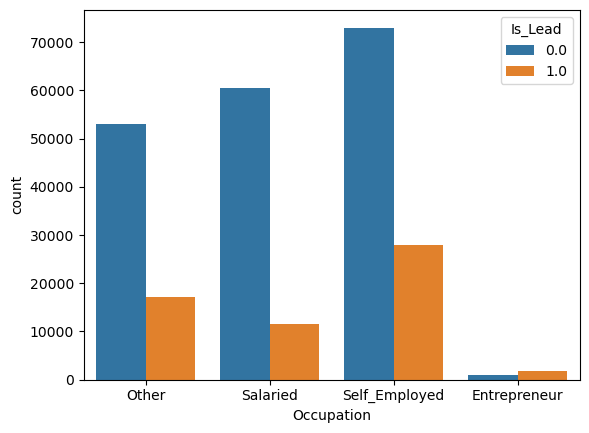

In [26]:
sns.countplot(data=df,x='Occupation',hue='Is_Lead')

Self employed customer is likely to get credit card. Where as entrepreneur has higher chance of getting credit card.

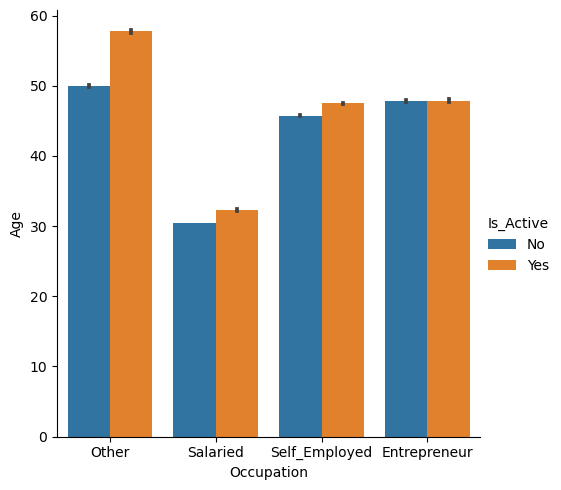

In [30]:
sns.catplot(data=df,x='Occupation',y='Age',hue='Is_Active',kind='bar')

Active customers more in Self_employed, salaried and other

<AxesSubplot:xlabel='Age', ylabel='Avg_Account_Balance'>

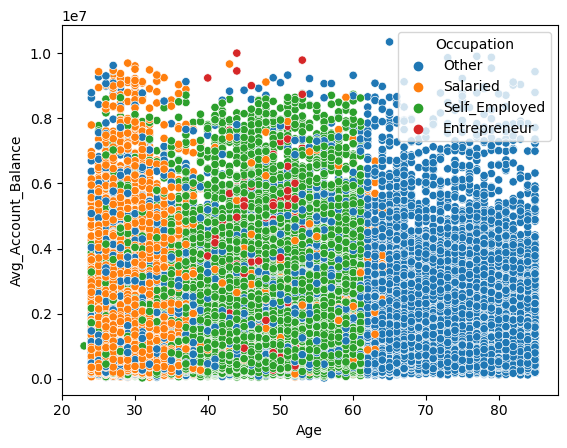

In [31]:
sns.scatterplot(data=df,x='Age',y='Avg_Account_Balance',hue='Occupation')

<AxesSubplot:xlabel='Age', ylabel='Count'>

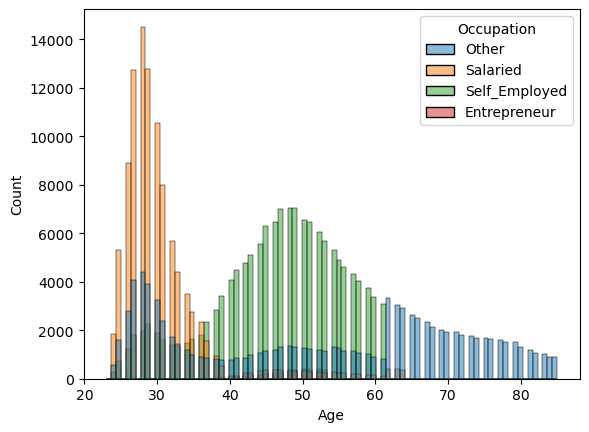

In [32]:
sns.histplot(data=df,x='Age',hue='Occupation')

Other category has highest age.

## 5. Data Preparation

In [33]:
df[:5]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,Train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,Train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,Train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,Train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,Train


In [34]:
# seperate the categorical column in the data

cat_col = ['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [35]:
df_new = df

In [36]:
df_new[:5]

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Source
0,NNVBBKZB,0,73,18,1,2,43,1,1045696,0,0.0,Train
1,IDD62UNG,0,30,27,2,0,32,1,581988,0,0.0,Train
2,HD3DSEMC,0,56,18,3,2,26,1,1484315,1,0.0,Train
3,BF3NC7KV,1,34,20,2,0,19,1,470454,0,0.0,Train
4,TEASRWXV,0,30,32,2,0,33,1,886787,0,0.0,Train


In [37]:
df_new.drop(['ID'],axis=1,inplace=True)

In [38]:
df_new[:5]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Source
0,0,73,18,1,2,43,1,1045696,0,0.0,Train
1,0,30,27,2,0,32,1,581988,0,0.0,Train
2,0,56,18,3,2,26,1,1484315,1,0.0,Train
3,1,34,20,2,0,19,1,470454,0,0.0,Train
4,0,30,32,2,0,33,1,886787,0,0.0,Train


In [40]:
df_traindata = df_new.loc[df_new['Source'] == 'Train']
df_testdata = df_new.loc[df_new['Source'] == 'Test']

In [41]:
df_traindata[:5]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Source
0,0,73,18,1,2,43,1,1045696,0,0.0,Train
1,0,30,27,2,0,32,1,581988,0,0.0,Train
2,0,56,18,3,2,26,1,1484315,1,0.0,Train
3,1,34,20,2,0,19,1,470454,0,0.0,Train
4,0,30,32,2,0,33,1,886787,0,0.0,Train


In [42]:
df_1 = df_traindata

In [43]:
df_1[:4]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Source
0,0,73,18,1,2,43,1,1045696,0,0.0,Train
1,0,30,27,2,0,32,1,581988,0,0.0,Train
2,0,56,18,3,2,26,1,1484315,1,0.0,Train
3,1,34,20,2,0,19,1,470454,0,0.0,Train


In [44]:
df_1.drop(['Source'],axis=1,inplace=True)

In [45]:
df_1[:5]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,1,1045696,0,0.0
1,0,30,27,2,0,32,1,581988,0,0.0
2,0,56,18,3,2,26,1,1484315,1,0.0
3,1,34,20,2,0,19,1,470454,0,0.0
4,0,30,32,2,0,33,1,886787,0,0.0


In [46]:
# Seperate the majority and minority class
df_majority = df_1[df_1['Is_Lead'] == 0]
df_minority = df_1[df_1['Is_Lead'] == 1]

print('The majority class values are :',len(df_majority))
print('The minority class values are :',len(df_minority))
print('Ratio of both class :',len(df_majority)/len(df_minority))

The majority class values are : 187437
The minority class values are : 58288
Ratio of both class : 3.215704776283283


In [47]:
# Undersample the minority class
from sklearn.utils import resample
df_majority_undersample = resample(df_majority,replace=True,n_samples=len(df_minority),random_state=0)
# Combined the minority class with oversampled majority class
df_undersample = pd.concat([df_minority,df_majority_undersample])
df_undersample['Is_Lead'].value_counts()

1.0    58288
0.0    58288
Name: Is_Lead, dtype: int64

In [48]:
df_1 = df_undersample

In [49]:
# display the new classes of count
print('The undersample class count is :',len(df_undersample))
print('The ratio of both sample is :',len(df_undersample[df_undersample['Is_Lead'] == 0])/len(df_undersample[df_undersample['Is_Lead'] == 1]))

The undersample class count is : 116576
The ratio of both sample is : 1.0


In [50]:
df_1[:4]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,1,62,32,1,2,20,0,1056750,1,1.0
15,1,33,18,3,1,69,0,517063,1,1.0
16,0,46,18,1,2,97,2,2282502,0,1.0
17,0,59,33,1,2,15,2,2384692,0,1.0


In [51]:
df_1.shape

(116576, 10)

In [53]:
# Input and output
X = df_1.drop(['Is_Lead'],axis=1)
X[:4]

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
6,1,62,32,1,2,20,0,1056750,1
15,1,33,18,3,1,69,0,517063,1
16,0,46,18,1,2,97,2,2282502,0
17,0,59,33,1,2,15,2,2384692,0


In [54]:
# Output
y = df_1['Is_Lead']
y[:5]

6     1.0
15    1.0
16    1.0
17    1.0
20    1.0
Name: Is_Lead, dtype: float64

In [56]:
# Standarding the value of X using standard Scalar
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()

In [58]:
X = pd.DataFrame(sc.fit_transform(X),columns = X.columns)
X.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0.871922,1.102987,1.080645,-1.254310,1.098078,-0.961192,-1.495172,-0.118958,1.192880
1,0.871922,-0.895316,-0.208525,1.008933,-0.052828,0.484610,-1.495172,-0.748273,1.192880
2,-1.146891,0.000475,-0.208525,-1.254310,1.098078,1.310784,1.220096,1.310361,-0.838307
3,-1.146891,0.896266,1.172729,-1.254310,1.098078,-1.108723,1.220096,1.429522,-0.838307
4,0.871922,-0.137339,-0.116441,1.008933,-0.052828,-0.990699,1.220096,-0.183209,-0.838307


In [59]:
# Spilting the dataset into training and testing using train_test_split
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## 6. Classification Modeling

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix

In [63]:
model = [LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),GaussianNB()]

for m in model:
    m.fit(X_train,y_train)
    score = m.score(X_train,y_train)*100
    y_pred = m.predict(X_test)
    print('The training score',m,'is :',score)
    print('The accuracy score is :',accuracy_score(y_test,y_pred))
    print('The roc_auc score is',roc_auc_score(y_test,y_pred))
    print('\n')

The training score LogisticRegression() is : 66.75734960724483
The accuracy score is : 0.6722900523260801
The roc_auc score is 0.6722909808780908


The training score RandomForestClassifier() is : 99.9975491097141
The accuracy score is : 0.8101106567923827
The roc_auc score is 0.8103742344771421


The training score DecisionTreeClassifier() is : 100.0
The accuracy score is : 0.741543476396077
The roc_auc score is 0.7416447289871999


The training score GaussianNB() is : 71.43242282759212
The accuracy score is : 0.7202413290252481
The roc_auc score is 0.7198172669286597




From above results we seee that Random Forest Classifier is performing better.

### Random Forest Classifier

In [67]:
# Hyperparameter tuning of random forest
rf = RandomForestClassifier()

param_grid = { 
    'n_estimators': [10,50,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [68]:
from sklearn.model_selection import GridSearchCV
cv_rf = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
cv_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]})

In [77]:
cv_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2')

In [78]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
print('The training score of RFC is',rfc.score(X_train,y_train))
y_pred_rfc = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test,y_pred_rfc)

The training score of RFC is 0.999950982194282


Text(50.722222222222214, 0.5, 'Actual')

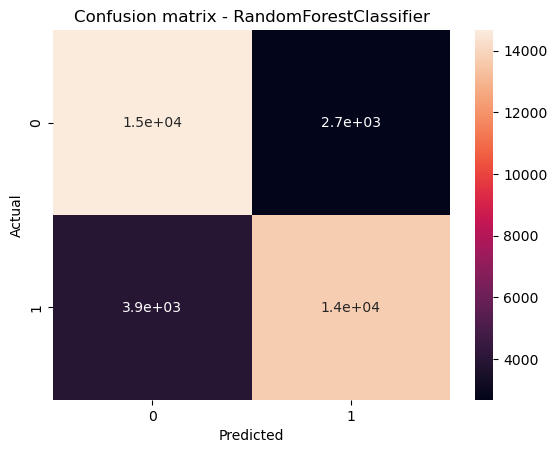

In [79]:
sns.heatmap(cm_rfc,annot=True)
plt.title('Confusion matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [80]:
print('Classification report - RandomForestClassifier')
print(classification_report(y_test,y_pred_rfc))

Classification report - RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82     17351
         1.0       0.84      0.78      0.81     17622

    accuracy                           0.81     34973
   macro avg       0.81      0.81      0.81     34973
weighted avg       0.81      0.81      0.81     34973



In [81]:
print('ROC score :',roc_auc_score(y_test,y_pred_rfc))

ROC score : 0.8112046032728971


In [82]:
# Now plot the ROC-AUC Curve
import sklearn.metrics as metrics
# Now calculate fpr,tpr and threshold
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,preds,pos_label=True)
roc_auc = metrics.auc(fpr,tpr)

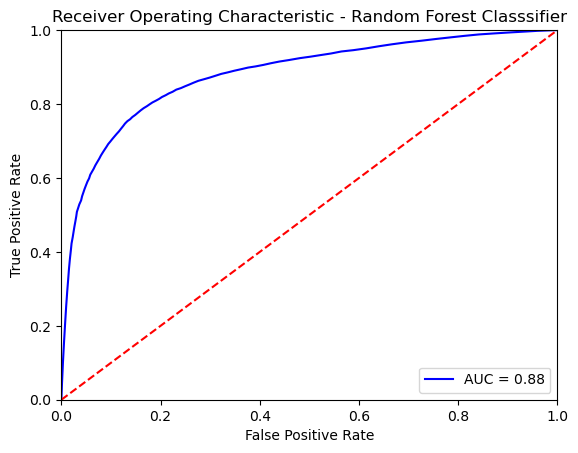

In [85]:
# Now plot the graph
plt.title('Receiver Operating Characteristic - Random Forest Classsifier')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Observation - Random Forest Model
Taken output variable as Is_Lead(transformed into probablistic value between 1 and 0)

base model selected is Random Forest (selected on basis of aoc_roc score) which provides max ROC score of 0.811

Plotted AOC/ROC line that shows good match between test and predicted values.

Also plotted confusion matrix, Overall model fit is good.

However, as the predicted probability was meaned in RF model upto 2 decimal places the resultant AUC score with test data was found to be ~ 0.88